### Setting up the data 

In [2]:
import pandas as pd

nba_data = pd.read_csv(r"seasons_clean.csv")

In [10]:
# nba_data.info()

# Selecting columns to keep/drop for data set
keep_list = [25,7,0,1,3,5,6,8,9,10,11,12,13,15,17,18,20,21,23,24,26,27,28]

In [11]:
# Defining dataset of chosen stats
nba_data2 = nba_data.iloc[:,keep_list]

nba_data2.head(1)

,PER,MPG,Season,Player,Age,G,GS,PPG,RPG,APG,...,FG,FG%,3P,3P%,FT,FT%,PFPG,TS%,USG%,OWS
0,10.9,27.085366,2009,Arron Afflalo,24.0,82.0,75.0,8.829268,3.073171,1.682927,...,272.0,0.465,108.0,0.434,72.0,0.735,2.743902,0.576,14.0,2.8


### Building datasets and dropping "Season"

In [32]:
# Reserving the 2018 season for "production"
# ***Player name included
nba_data_prod = nba_data2[nba_data2['Season'] == 2018]
nba_data_prod = nba_data_prod.drop(columns=['Season'])

# Setting the remainder of data for test and train
nba_data_train_test = nba_data2[nba_data2['Season'] != 2018].drop(columns=["Player","Season"])

# renaming for ease
nba_tt = nba_data_train_test
nba_tt.head(1)

,PER,MPG,Age,G,GS,PPG,RPG,APG,SPG,BPG,...,FG,FG%,3P,3P%,FT,FT%,PFPG,TS%,USG%,OWS
0,10.9,27.085366,24.0,82.0,75.0,8.829268,3.073171,1.682927,0.560976,0.365854,...,272.0,0.465,108.0,0.434,72.0,0.735,2.743902,0.576,14.0,2.8


### BUilding X and y dataframe 

In [33]:
nba_tt.head(10)

,PER,MPG,Age,G,GS,PPG,RPG,APG,SPG,BPG,...,FG,FG%,3P,3P%,FT,FT%,PFPG,TS%,USG%,OWS
0,10.9,27.085366,24.0,82.0,75.0,8.829268,3.073171,1.682927,0.560976,0.365854,...,272.0,0.465,108.0,0.434,72.0,0.735,2.743902,0.576,14.0,2.8
1,6.3,5.000000,21.0,6.0,0.0,1.666667,0.666667,0.000000,0.166667,0.166667,...,5.0,0.500,0.0,0.000,0.0,0.000,0.833333,0.479,19.3,-0.1
2,18.2,37.461538,24.0,78.0,78.0,17.858974,8.038462,2.051282,0.858974,0.615385,...,579.0,0.495,5.0,0.313,230.0,0.757,2.961538,0.535,22.9,5.5
3,2.8,3.625000,23.0,8.0,0.0,0.500000,0.625000,0.250000,0.125000,0.125000,...,1.0,0.167,0.0,0.000,2.0,0.667,1.125000,0.273,11.3,0.0
4,5.9,8.941176,31.0,51.0,3.0,2.058824,1.607843,0.313725,0.215686,0.098039,...,46.0,0.397,1.0,0.167,12.0,0.923,1.333333,0.431,14.0,-0.3
5,15.2,35.237500,34.0,80.0,80.0,16.300000,3.162500,2.625000,0.800000,0.312500,...,464.0,0.477,145.0,0.363,231.0,0.913,2.275000,0.601,20.2,5.1
6,14.2,16.462963,28.0,54.0,8.0,6.111111,2.685185,1.333333,1.092593,0.351852,...,129.0,0.510,0.0,0.000,72.0,0.605,2.018519,0.540,19.6,0.2
7,8.2,27.326923,33.0,52.0,38.0,8.211538,2.480769,3.384615,0.961538,0.192308,...,155.0,0.348,58.0,0.345,59.0,0.728,1.980769,0.443,18.8,-1.6
8,8.7,28.370370,33.0,27.0,13.0,9.703704,2.777778,3.851852,1.000000,0.185185,...,95.0,0.343,28.0,0.322,44.0,0.815,1.851852,0.436,21.7,-1.2
9,7.7,26.200000,33.0,25.0,25.0,6.600000,2.160000,2.880000,0.920000,0.200000,...,60.0,0.355,30.0,0.370,15.0,0.556,2.120000,0.456,15.4,-0.4


In [35]:
# Defining inputs
X = nba_tt.drop(columns=["PER"])

# Defining outputs
y = nba_tt[['PER']].values.reshape(-1,1)

print(X.shape)
print(y.shape)
y.max()


(5426, 20)
(5426, 1)


133.8

In [36]:
X

,MPG,Age,G,GS,PPG,RPG,APG,SPG,BPG,TOPG,FG,FG%,3P,3P%,FT,FT%,PFPG,TS%,USG%,OWS
0,27.085366,24.0,82.0,75.0,8.829268,3.073171,1.682927,0.560976,0.365854,0.902439,272.0,0.465,108.0,0.434,72.0,0.735,2.743902,0.576,14.0,2.8
1,5.000000,21.0,6.0,0.0,1.666667,0.666667,0.000000,0.166667,0.166667,0.333333,5.0,0.500,0.0,0.000,0.0,0.000,0.833333,0.479,19.3,-0.1
2,37.461538,24.0,78.0,78.0,17.858974,8.038462,2.051282,0.858974,0.615385,1.333333,579.0,0.495,5.0,0.313,230.0,0.757,2.961538,0.535,22.9,5.5
3,3.625000,23.0,8.0,0.0,0.500000,0.625000,0.250000,0.125000,0.125000,0.000000,1.0,0.167,0.0,0.000,2.0,0.667,1.125000,0.273,11.3,0.0
4,8.941176,31.0,51.0,3.0,2.058824,1.607843,0.313725,0.215686,0.098039,0.431373,46.0,0.397,1.0,0.167,12.0,0.923,1.333333,0.431,14.0,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,16.700000,28.0,42.0,33.0,7.100000,4.600000,0.700000,0.200000,0.500000,0.800000,3.0,0.546,0.2,0.385,1.0,0.667,1.900000,0.598,16.4,2.0
5422,16.900000,28.0,24.0,1.0,5.900000,4.600000,0.800000,0.300000,0.600000,0.500000,2.6,0.590,0.0,0.000,0.7,0.895,2.000000,0.598,16.4,2.0
5423,15.300000,23.0,54.0,12.0,4.000000,2.400000,0.900000,0.400000,0.300000,0.800000,1.5,0.346,0.7,0.336,0.4,0.760,1.600000,0.445,15.2,-1.1
5424,6.700000,21.0,32.0,2.0,3.700000,1.900000,0.200000,0.100000,0.400000,0.300000,1.5,0.731,0.0,0.000,0.7,0.724,0.900000,0.746,18.8,0.9


### Starting data-modeling process 

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Scaling data 

In [41]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Model fit and score 

In [43]:
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7641592364679676
Testing Score: 0.7953058185643506


### Select Player 

In [44]:
# Selecting a random player from test data set
X_player = X_test.sample(n=1)

In [46]:
print(X_player)

     MPG   Age     G    GS        PPG       RPG       APG       SPG      BPG  \
731   42  22.0  74.0  74.0  18.554054  3.864865  5.837838  1.472973  0.27027   

         TOPG     FG   FG%     3P    3P%     FT    FT%      PFPG    TS%  USG%  \
731  3.054054  505.0  0.48  151.0  0.442  212.0  0.934  3.148649  0.595  24.4   

     OWS  
731  5.4  


### Running the Loop

In [49]:
max_mpg = int(nba_tt["MPG"].max())
PER_list = list()

# Building predictions based on each minute of MPG
for i in range(1,max_mpg+1):
    X_player["MPG"] = i
    X_player_scaled = X_scaler.transform(X_player)
    y_player = model.predict(X_player_scaled)
    
    PER_list.append(y_player[0][0].round(3))
    
PER_list

[29.021,
 28.663,
 28.306,
 27.948,
 27.59,
 27.232,
 26.874,
 26.516,
 26.158,
 25.8,
 25.442,
 25.084,
 24.726,
 24.369,
 24.011,
 23.653,
 23.295,
 22.937,
 22.579,
 22.221,
 21.863,
 21.505,
 21.147,
 20.79,
 20.432,
 20.074,
 19.716,
 19.358,
 19.0,
 18.642,
 18.284,
 17.926,
 17.568,
 17.21,
 16.853,
 16.495,
 16.137,
 15.779,
 15.421,
 15.063,
 14.705,
 14.347]

### Summarizing Weights for each Stat

In [55]:
importance = model.coef_
importance

list1 = list()
list2 = list()

for i in range(0,len(X.columns)):
    list1.append(importance[0][i].round(4))
    list2.append(X.columns[i])
    
df = pd.DataFrame(list(zip(list1, list2)),
               columns =['Weight', 'Stat']).set_index('Stat').sort_values(by='Weight',ascending=False)
df.T

Stat,PPG,TS%,APG,RPG,SPG,USG%,BPG,FG,FT,FG%,G,Age,3P,FT%,3P%,GS,PFPG,OWS,TOPG,MPG
Weight,3.9908,3.9501,3.0334,2.4134,1.1232,0.8835,0.7643,0.3725,0.3597,0.2387,-0.0361,-0.0641,-0.1763,-0.2398,-0.3122,-0.3517,-0.744,-0.7454,-3.3104,-3.3746


###  Summarizing PER results for each potential MPG

Text(0.5, 1.0, 'MPG vs. PER')

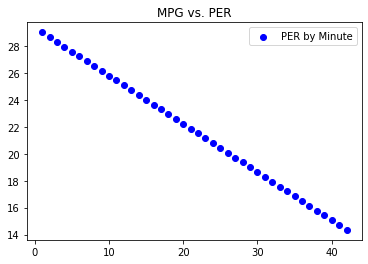

In [52]:
import matplotlib.pyplot as plt

plt.scatter(range(1,max_mpg+1), PER_list, c="blue", label="PER by Minute")
plt.legend()
plt.title("MPG vs. PER")